In [2]:
#7Regression model for Fetch House Pricing using KNeighborRegressor
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import fetch_california_housing

In [5]:
data=fetch_california_housing()

In [6]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [7]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
df['target']=data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
X=df.drop(columns=['target'])
Y=df['target']
print(X.shape,Y.shape)

(20640, 8) (20640,)


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
#Scale the features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
#Train the KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)  # variable Kneighbors value
model.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
#Predict house prices
y_pred =model.predict(X_test)
y_pred

array([1.2354, 2.9822, 2.9272, ..., 2.1794, 1.4132, 0.6998], shape=(4128,))

In [20]:
comparison_df=pd.DataFrame(
    {
        'Actual':y_test,
        'Predicted':y_pred
    }
)
comparison_df

,Actual,Predicted
16678,0.550,1.2354
10358,3.148,2.9822
8670,3.812,2.9272
19996,1.069,1.0158
10611,2.659,2.4810
...,...,...
4489,1.250,1.8254
15410,1.514,1.3090
15146,2.278,2.1794
19393,0.872,1.4132


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.44


In [23]:
#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.45


In [24]:
#Rs-Squared Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.68


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

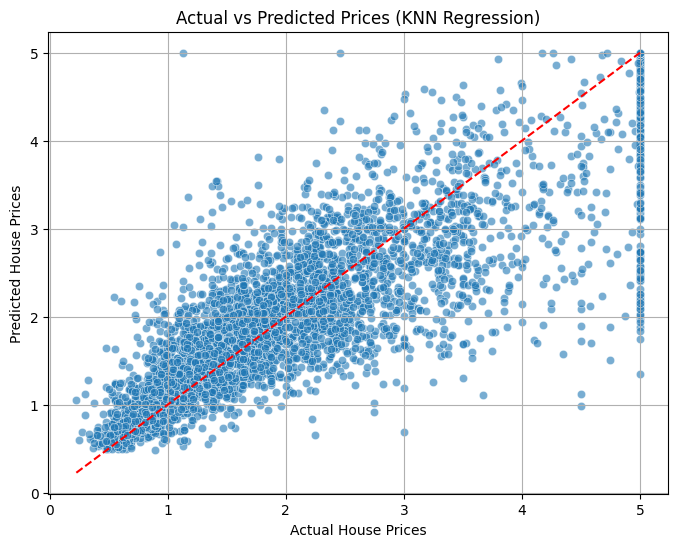

In [26]:
#Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (KNN Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()